In [1]:
import control
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch import nn

In [2]:
from net_identification_utils import train,\
    plot_discrete_output,\
    generate_data,\
    generate_data_for_input_output_rnn_training,\
    ControlLSTMInputsOutputs

In [3]:
system = control.TransferFunction(np.array([1, 0]), np.array([1, -7/12, 1/4, -1/24]), 1)

In [4]:
train_dataset = generate_data_for_input_output_rnn_training(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=20,
    sample_u_size=100,
    layer_input_size=20,
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [5]:
model = ControlLSTMInputsOutputs(window_size=100, layer_input_size=20, hidden_size=50, output_size=20, num_layers=2)

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [7]:
train(model, 100, train_dataloader, nn.MSELoss())

epoch 0, mse 0.0745498448505532
epoch 1, mse 0.005619867350324057
epoch 2, mse 0.001117909997847164
epoch 3, mse 0.0004486225201981142
epoch 4, mse 0.00033673381483822595
epoch 5, mse 0.00029548235139372994
epoch 6, mse 0.0002722261133385473
epoch 7, mse 0.0002726722400984727
epoch 8, mse 0.00034726024146948477
epoch 9, mse 0.0002599096802077838
epoch 10, mse 0.0002369124910183018
epoch 11, mse 0.00022125768859041273
epoch 12, mse 0.00020019586339913074
epoch 13, mse 0.00024614052945253205
epoch 14, mse 0.0002461129645234905
epoch 15, mse 0.00016850061700097286
epoch 16, mse 0.0002775198690324032
epoch 17, mse 0.00017223114733496913
epoch 18, mse 0.00015881210405495948
epoch 19, mse 0.00017892605188535527
epoch 20, mse 0.0001279139479083824
epoch 21, mse 0.00019574167017708533
epoch 22, mse 0.00011965834018155874
epoch 23, mse 0.00011534795059560565
epoch 24, mse 0.00012485145198297686
epoch 25, mse 0.00016958257619990036
epoch 26, mse 0.00012216302930028177
epoch 27, mse 0.00011079233

In [20]:
test_dataset = generate_data(
    control_sys=system,
    impact_time=180,
    cooldown_time=0,
    n_signals=1000,
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [21]:
model.test(test_dataset, nn.MSELoss(), batch_size=1)

1.3482839686730585e-05

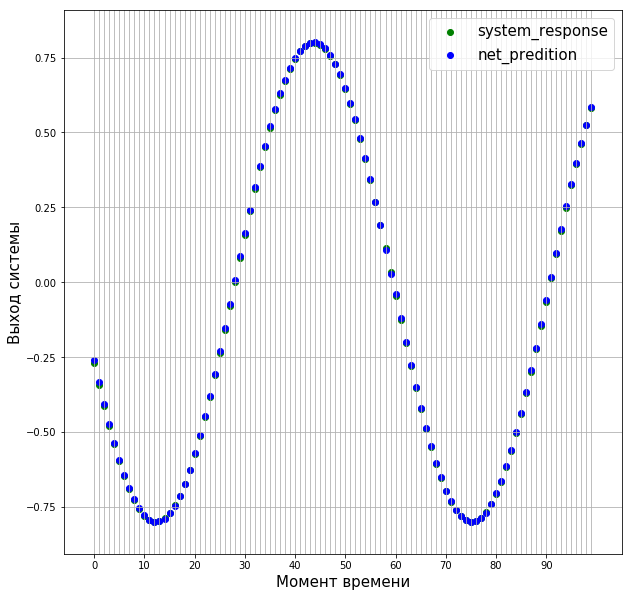

In [22]:
u = np.sin(np.arange(1000) * 0.1) / 2
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
prediction = model.predict(torch.tensor(u, requires_grad=True).float())
plot_discrete_output(
    system_response=response[100:200],
    net_predition=prediction[0, 100:200],
    # file_name='reports/rnn_2_prediction.png'
)

### shifted frequencies

In [23]:
test_dataset = generate_data(
    control_sys=system,
    impact_time=180,
    cooldown_time=0,
    n_signals=1000,
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) / 2
)

In [24]:
model.test(test_dataset, nn.MSELoss())

0.012449543755501509

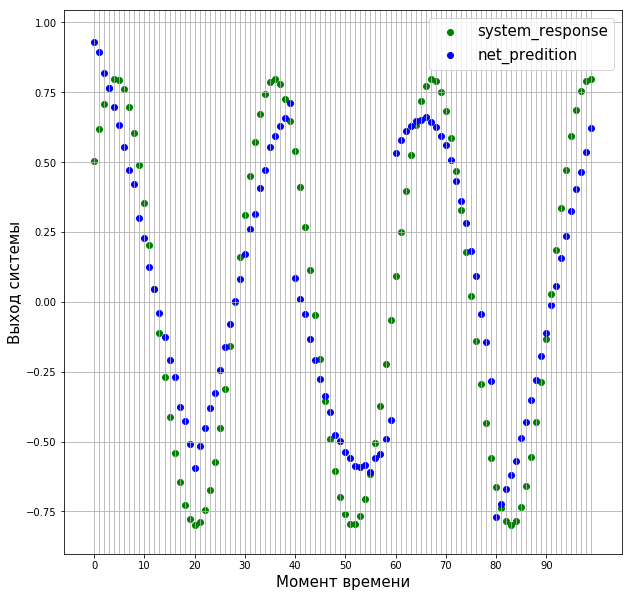

In [33]:
u = np.sin(np.arange(1000) * 0.2) / 2
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
prediction = model.predict(torch.tensor(u, requires_grad=True).float())
plot_discrete_output(
    system_response=response[100:200],
    net_predition=prediction[0, 100:200],
    # file_name='reports/rnn_2_prediction_shifted_0_2.png'
)

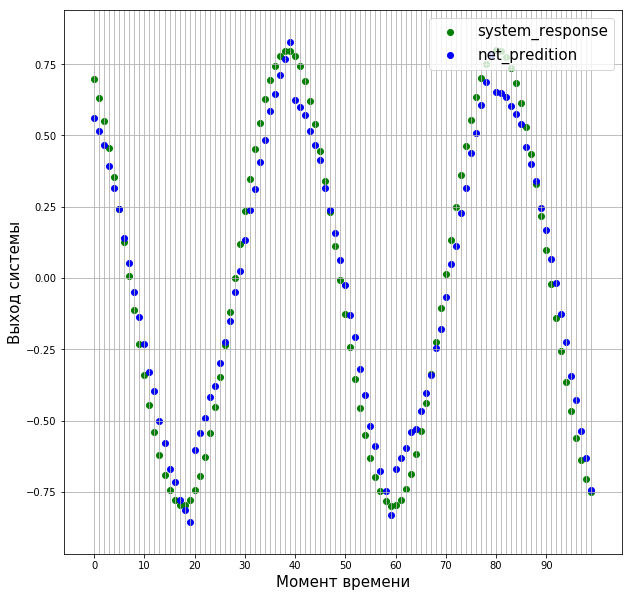

In [34]:
u = np.sin(np.arange(1000) * 0.15) / 2
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
prediction = model.predict(torch.tensor(u, requires_grad=True).float())
plot_discrete_output(
    system_response=response[100:200],
    net_predition=prediction[0, 100:200],
    # file_name='reports/rnn_2_prediction_shifted_0_15.png'
)

### mixed signals as input

In [26]:
test_dataset = generate_data(
    control_sys=system,
    impact_time=180,
    cooldown_time=0,
    n_signals=1000,
    u_signal_generation_func=lambda x:
    (   # random mixture of two sinus with different frequencies
        np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) + 
        np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1))
    ) / 4
)

In [27]:
model.test(test_dataset, nn.MSELoss())

0.0019043517933459953

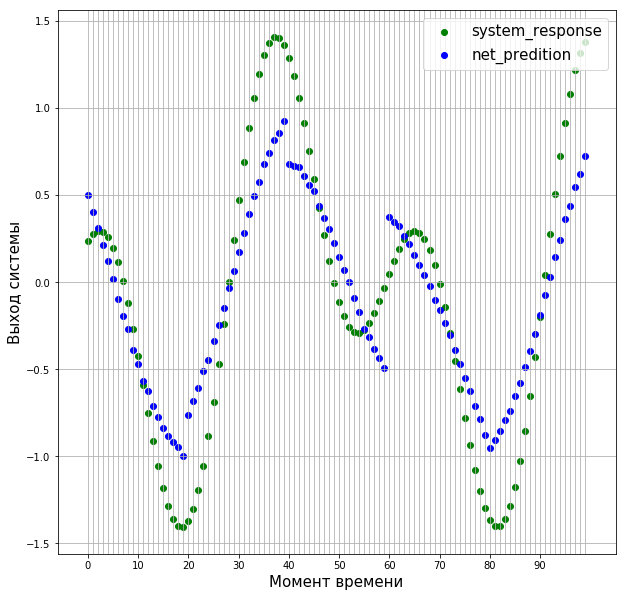

In [28]:
u = (np.sin(np.arange(1000) * 0.2) + np.sin(np.arange(1000) * 0.1)) / 2
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
prediction = model.predict(torch.tensor(u, requires_grad=True).float())
plot_discrete_output(
    system_response=response[100:200],
    net_predition=prediction[0, 100:200],
    # file_name='reports/rnn_2_prediction_mix_0_1_0_2.png'
)

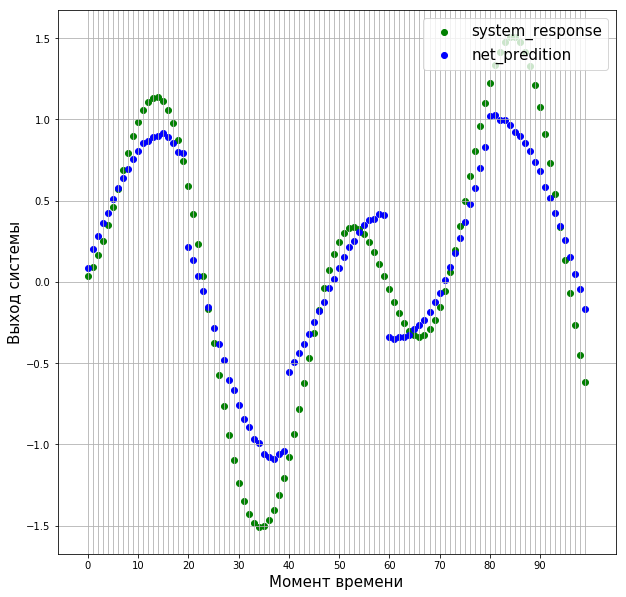

In [29]:
u = (np.sin(np.arange(1000) * 0.18) + np.sin(np.arange(1000) * 0.08)) / 2
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
prediction = model.predict(torch.tensor(u, requires_grad=True).float())
plot_discrete_output(
    system_response=response[100:200],
    net_predition=prediction[0, 100:200],
    # file_name='reports/rnn_2_prediction_mix_0_08_0_18.png'
)

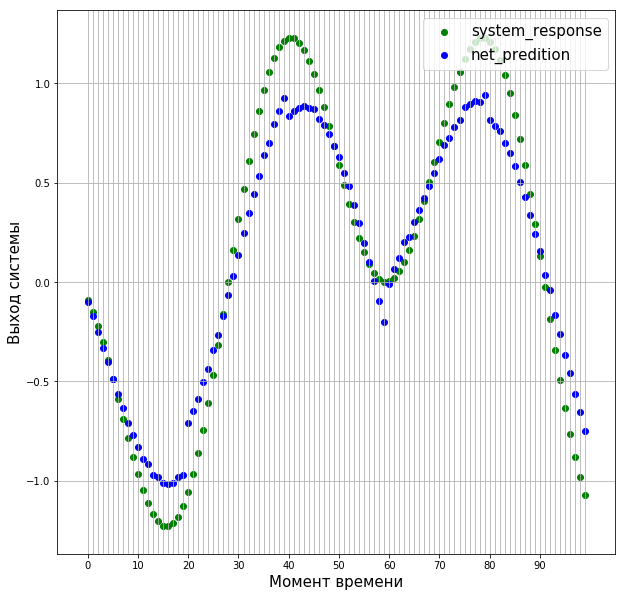

In [30]:
u = (np.sin(np.arange(1000) * 0.15) + np.sin(np.arange(1000) * 0.05)) / 2
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
prediction = model.predict(torch.tensor(u, requires_grad=True).float())
plot_discrete_output(
    system_response=response[100:200],
    net_predition=prediction[0, 100:200],
    # file_name='reports/rnn_2_prediction_mix_0_05_0_15.png'
)